### US Baby Names 1880–2021
The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present.

There are many things you might want to do with the dataset:
* Visualize the proportion of babies given a particular name (your own, or another name) over time
* Determine the relative rank of a name
* Determine the most popular names in each year or the names whose popularity has advanced or declined the most
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
* Analyze external sources of trends: biblical names, celebrities, demographic changes

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#### Loading the data

In [3]:
dataframes = []
for year in range(1880, 2022):
    frame = pd.read_csv(f'datasets/babynames/yob{year}.txt', names=["name", "sex", "births"])
    frame['year'] = year
    dataframes.append(frame)

baby_data = pd.concat(dataframes, ignore_index=True)
baby_data

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


#### Exploratory Data Analysis

In [4]:
baby_pivot_data = baby_data.pivot_table('births', index='year', columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

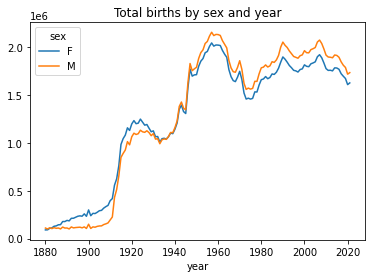

In [5]:
baby_pivot_data.plot(title='Total births by sex and year')

In [6]:
# proportion of baby names to total births

def name_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

baby_data = baby_data.groupby(['sex', 'year']).apply(name_prop)
baby_data

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000003
2052777,Zyel,M,5,2021,0.000003
2052778,Zyian,M,5,2021,0.000003
2052779,Zylar,M,5,2021,0.000003


In [7]:
# validate previous operation if sums to 1.0 within all groups
baby_data.groupby(['sex', 'year'])['prop'].sum()

sex  year
F    1880    1.0
     1881    1.0
     1882    1.0
     1883    1.0
     1884    1.0
            ... 
M    2017    1.0
     2018    1.0
     2019    1.0
     2020    1.0
     2021    1.0
Name: prop, Length: 284, dtype: float64

In [8]:
# top 1000 name for sex/year combination

def get_top1000(group):
    return group.sort_values('births', ascending=False)[:1000]

baby_data_1000 = baby_data.groupby(['sex', 'year']).apply(get_top1000)
baby_data_1000

name sex  births  year      prop
sex year                                               
F   1880 0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
M   2021 2039783        Zev   M     218  2021  0.000126
         2039789     Harris   M     217  2021  0.000125
         2039793     Ronnie   M     217  2021  0.000125
         2039792    Merrick   M     217  2021  0.000125
         2039791     Mayson   M     217  2021  0.000125

[283876 rows x 5 columns]

In [9]:
# querying multiindex dataframe
baby_data_1000.query(("year==1880 & sex=='F'"))
baby_data_1000.query(("year==1880 & sex=='F'"))[:10]

name sex  births  year      prop
sex year                                         
F   1880 0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188
         5   Margaret   F    1578  1880  0.017342
         6        Ida   F    1472  1880  0.016177
         7      Alice   F    1414  1880  0.015539
         8     Bertha   F    1320  1880  0.014506
         9      Sarah   F    1288  1880  0.014155

In [10]:
# drop group index as no longer required
baby_data_1000 = baby_data_1000.reset_index(drop=True)
baby_data_1000.index

RangeIndex(start=0, stop=283876, step=1)

##### Analyzing Naming Trends

In [11]:
girls = baby_data_1000[baby_data_1000.sex=='F']
boys = baby_data_1000[baby_data_1000.sex=='M']

In [12]:
total_births = baby_data_1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Ab,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,241.0,291.0,4185.0,NaN,526.0,NaN,7211.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,850.0,NaN,301.0,NaN
2018,NaN,NaN,3834.0,NaN,488.0,NaN,5982.0,NaN,NaN,NaN,...,276.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3654.0,NaN,419.0,NaN,5529.0,NaN,NaN,NaN,...,265.0,NaN,NaN,353.0,NaN,NaN,1181.0,NaN,540.0,213.0


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

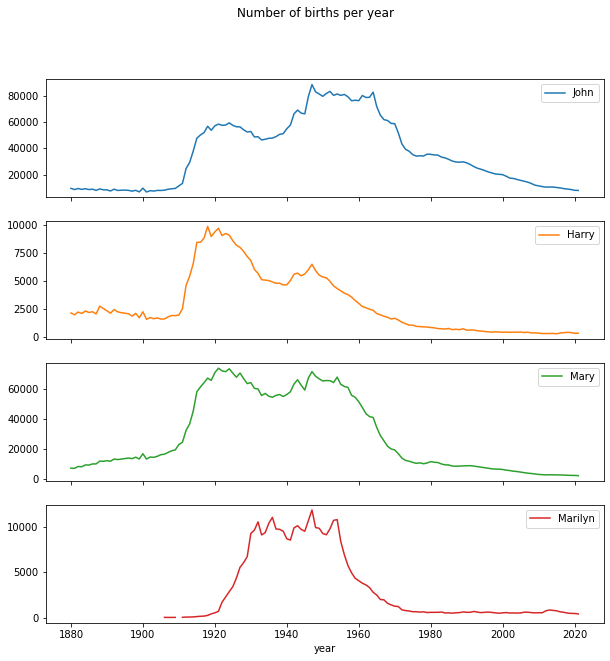

In [13]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(10,10), title='Number of births per year')

##### Measuring the increase in naming diversity

<AxesSubplot:title={'center':'sum of top 1000 prop by sex, year'}, xlabel='year'>

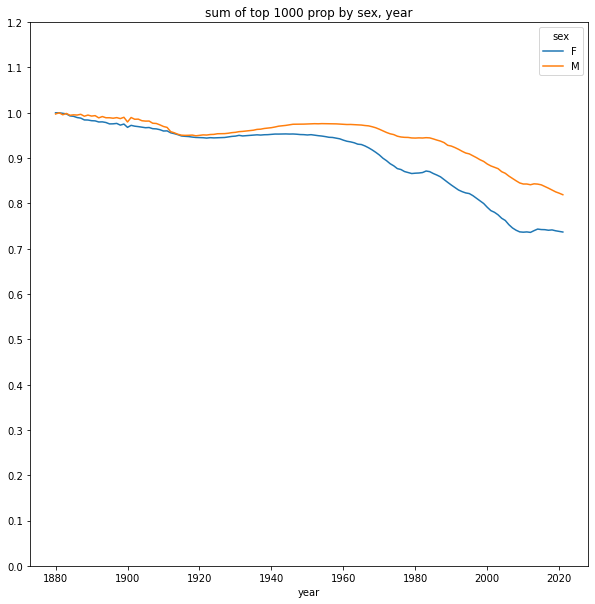

In [14]:
table = baby_data_1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.plot(figsize=(10,10), title='sum of top 1000 prop by sex, year', yticks=np.linspace(0,1.2,13))

# Interpretation:
# there appears to be increasing name diversity (decreasing total proportion in the top 1,000)

In [15]:
df = boys[boys.year==2010]
df

,name,sex,births,year,prop
271876,Jacob,M,22139,2010,0.011546
271877,Ethan,M,18008,2010,0.009392
271878,Michael,M,17366,2010,0.009057
271879,Jayden,M,17191,2010,0.008966
271880,William,M,17060,2010,0.008897
...,...,...,...,...,...
272871,Bailey,M,196,2010,0.000102
272872,Destin,M,196,2010,0.000102
272873,Eliezer,M,196,2010,0.000102
272874,Enoch,M,196,2010,0.000102


In [16]:
# After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%

prop_cumsum = df.prop.sort_values(ascending=False).cumsum()
# searchsorted returns the position in the cumulative sum 
# at which 0.5 would need to be inserted to keep it in sorted order
prop_cumsum.searchsorted(0.5)

# Since arrays are zero-indexed, adding 1 to this result gives a result of 117.

116

In [17]:
# By contrast, in 1900 this number was much smaller:

df_1900 = boys[boys.year==1900]
prop_cumsum_1900 = df_1900.prop.sort_values(ascending=False).cumsum()
prop_cumsum_1900.searchsorted(0.5) + 1  # +1 to account for zero based index

25

In [18]:
def get_quantile_count(group, q=0.5):
    group = group.prop.sort_values(ascending=False).cumsum()
    return group.searchsorted(q) + 1

diversity = baby_data_1000.groupby(['year', 'sex']).apply(get_quantile_count).unstack()
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2017,254,143
2018,259,149
2019,264,155


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

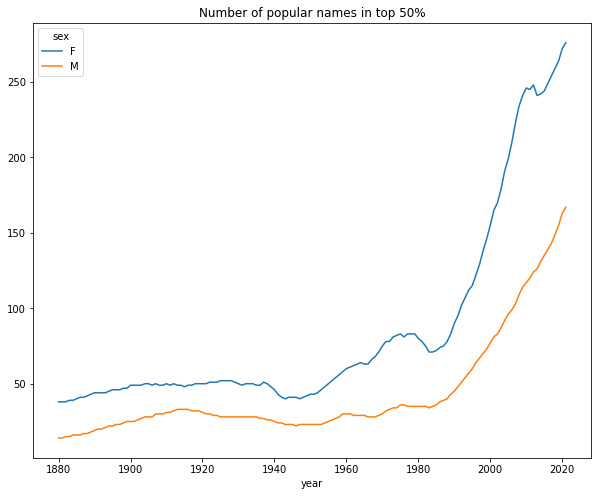

In [19]:
diversity.plot(title='Number of popular names in top 50%', figsize=(10,8))

# As can be seen, girl names have always been more diverse than boy names, and they have only become more so over time

##### The “last letter” revolution

In [20]:
def get_last_letter(x):
    return x[-1]

last_letters = baby_data.name.apply(get_last_letter)
last_letters.name = 'last_letters'

table = baby_data.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
table

sex                 F                                                        \
year             1880     1881     1882     1883     1884     1885     1886   
last_letters                                                                  
a             31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                 NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d               609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e             33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                 7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h              4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i                61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k                13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l              2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m                58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n              3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o                30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r               481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s              1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t              2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u               380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                 NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                 NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y             10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z               106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                      ...         M                      \
year             1887     1888     1889  ...      2012      2013      2014   
last_letters                             ...                                 
a             48942.0  59440.0  58631.0  ...   27227.0   27473.0   28318.0   
b                 NaN      NaN      NaN  ...   34745.0   33278.0   31410.0   
c                 NaN      NaN      NaN  ...   24293.0   24090.0   23847.0   
d              1027.0   1298.0   1374.0  ...   42520.0   42719.0   44077.0   
e             54353.0  66748.0  66662.0  ...  128591.0  132323.0  132195.0   
f                 NaN      NaN      NaN  ...    2482.0    2593.0    2882.0   
g                25.0     44.0     28.0  ...    3807.0    4430.0    4724.0   
h              7141.0   8630.0   8825.0  ...   99135.0  100022.0  102156.0   
i               105.0    141.0    134.0  ...   47156.0   45456.0   46634.0   
j                 NaN      NaN      NaN  ...    1500.0    1405.0    1360.0   
k                19.0     21.0     22.0  ...   34141.0   34887.0   35794.0   
l              6174.0   7900.0   8395.0  ...  129078.0  126884.0  127612.0   
m                90.0    123.0    137.0  ...   55109.0   57108.0   58765.0   
n              5512.0   6832.0   7103.0  ...  682713.0  669666.0  673646.0   
o                97.0    134.0    142.0  ...   78259.0   79519.0   82402.0   
p                 NaN      NaN      NaN  ...    2527.0    2598.0    2524.0   
q                 NaN      NaN      NaN  ...     337.0     336.0     312.0   
r               910.0   1207.0   1214.0  ...  167657.0  170458.0  178236.0   
s              2803.0   3581.0   3569.0  ...  122072.0  123889.0  1282

In [21]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable

sex                  F                            M                    
year              1910      1960      2010     1910      1960      2010
last_letters                                                           
a             108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b                  NaN     694.0     455.0    411.0    3910.0   39298.0
c                  5.0      49.0     957.0    482.0   15456.0   23360.0
d               6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e             133601.0  435009.0  316921.0  28665.0  178742.0  130325.0
f                  NaN      20.0      97.0    152.0    9232.0    2313.0
g                 57.0     318.0     669.0    439.0   20231.0    2697.0
h              20432.0   73243.0  134989.0   8849.0   80828.0   99362.0
i                605.0   80806.0   56302.0    164.0    1300.0   43471.0
j                  NaN       NaN     165.0      NaN       NaN    1480.0
k                 48.0     313.0     631.0   7104.0  105264.0   35531.0
l              17124.0   68487.0   46877.0  12628.0  223629.0  135094.0
m                476.0   17412.0    4617.0  11273.0   72128.0   47369.0
n              31418.0  264224.0  248763.0  27847.0  325157.0  694902.0
o                663.0    4933.0    2215.0   3314.0   27376.0   81607.0
p                  7.0      47.0      35.0    616.0   12096.0    2432.0
q                  NaN       NaN      53.0      NaN       NaN     345.0
r               5311.0   13680.0   32055.0  12521.0   66185.0  167562.0
s              15478.0   25809.0   23689.0  25402.0  218954.0  124932.0
t              10877.0   30730.0   13924.0  14155.0  139957.0   43835.0
u                271.0    1162.0     739.0     24.0     121.0    2354.0
v                  NaN     122.0     208.0     22.0      77.0    2782.0
w                  8.0      63.0    2114.0   1228.0   16431.0   31027.0
x                  6.0      74.0    1296.0    770.0    3947.0   16487.0
y              44002.0  308459.0  207388.0  15021.0  343256.0  111600.0
z                966.0    1330.0    1243.0     33.0     393.0    3507.0

In [22]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                  F                             M                    
year              1910      1960      2010      1910      1960      2010
last_letters                                                            
a             0.273386  0.341882  0.381245  0.005031  0.002446  0.015066
b                  NaN  0.000343  0.000256  0.002116  0.001834  0.020495
c             0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d             0.017026  0.001846  0.001489  0.113857  0.122940  0.023394
e             0.336947  0.215138  0.178424  0.147599  0.083838  0.067969
f                  NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g             0.000144  0.000157  0.000377  0.002260  0.009489  0.001407
h             0.051530  0.036223  0.075998  0.045564  0.037912  0.051821
i             0.001526  0.039963  0.031698  0.000844  0.000610  0.022672
j                  NaN       NaN  0.000093       NaN       NaN  0.000772
k             0.000121  0.000155  0.000355  0.036579  0.049374  0.018531
l             0.043187  0.033871  0.026391  0.065023  0.104892  0.070456
m             0.001200  0.008611  0.002599  0.058046  0.033831  0.024705
n             0.079237  0.130675  0.140052  0.143387  0.152513  0.362416
o             0.001672  0.002440  0.001247  0.017064  0.012841  0.042561
p             0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                  NaN       NaN  0.000030       NaN       NaN  0.000180
r             0.013395  0.006766  0.018047  0.064472  0.031044  0.087389
s             0.039036  0.012764  0.013337  0.130797  0.102699  0.065156
t             0.027432  0.015198  0.007839  0.072885  0.065646  0.022861
u             0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                  NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w             0.000020  0.000031  0.001190  0.006323  0.007707  0.016182
x             0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y             0.110975  0.152551  0.116758  0.077345  0.161003  0.058203
z             0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

<AxesSubplot:title={'center':'Female'}, xlabel='Last Letters'>

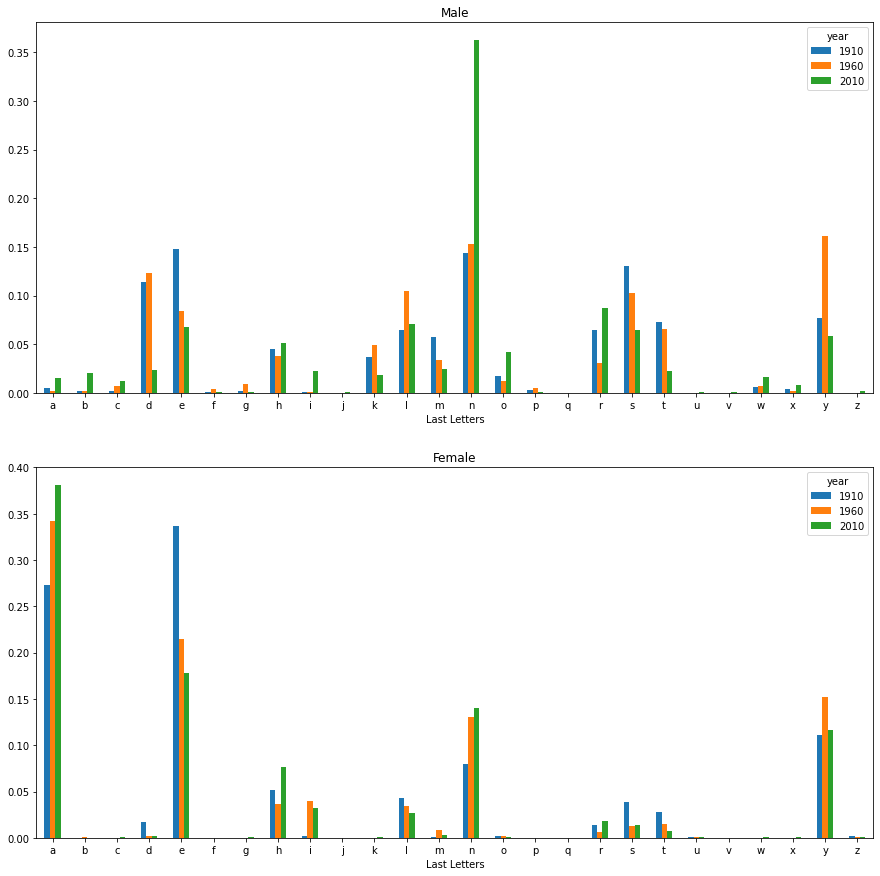

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(15,15))
letter_prop['M'].plot(kind='bar', ax=axes[0], rot=0, title='Male', xlabel='Last Letters')
letter_prop['F'].plot(kind='bar', ax=axes[1], rot=0, title='Female', xlabel='Last Letters')

# Interpretation
# As you can see, boy names ending in n have experienced significant growth since the 1960s
# alternatively, girl names ending in a have experienced steady growth over the years

In [24]:
# normalize by year and sex and select a subset of letters for the boy names, 
# finally transposing to make each column a time series
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts

last_letters,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408
...,...,...,...
2017,0.022814,0.337869,0.049943
2018,0.023099,0.333495,0.048818
2019,0.022798,0.323742,0.048081


<AxesSubplot:xlabel='year'>

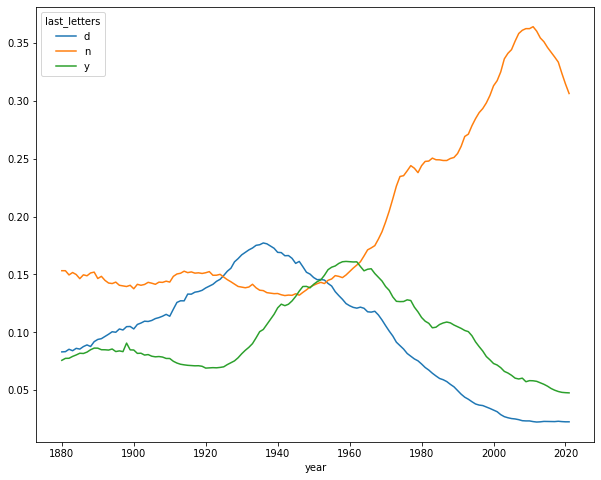

In [25]:
dny_ts.plot(figsize=(10,8))

##### Boy names that became girl names (and vice versa)

In [51]:
all_names = pd.Series(baby_data_1000.name.unique())

lesley_like = all_names[all_names.str.contains('Lesl')]

filtered_lesley = baby_data_1000[baby_data_1000.name.isin(lesley_like)]

filtered_lesley.groupby('name')['births'].sum()

# aggregate by sex and year and normalize within year
table = filtered_lesley.pivot_table('births', index='year', columns='sex', aggfunc=sum)

table = table.div(table.sum(axis='columns'), axis='index')
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2017,1.000000,NaN
2018,1.000000,NaN
2019,1.000000,NaN


<AxesSubplot:xlabel='year'>

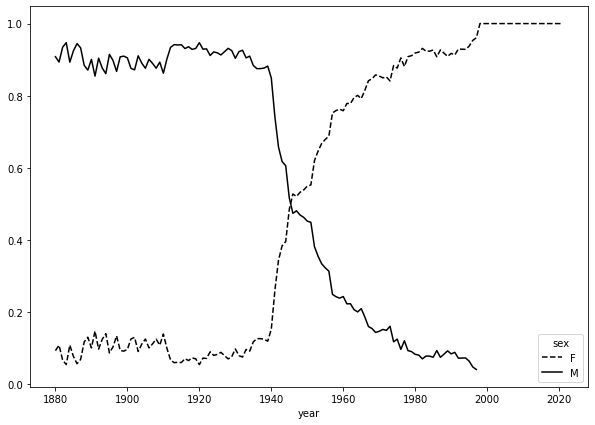

In [63]:
# Proportion of male/female Lesley-like names over time
table.plot(style={'M': 'k-', 'F':'k--'}, figsize=(10,7))

In [28]:
# Todo: find all the names that are common to boys and girls
# t= boys.drop_duplicates('name')
# t[t.name=='Merrick']
pd.merge(boys.drop_duplicates('name'), girls.drop_duplicates('name'), on='name')

,name,sex_x,births_x,year_x,prop_x,sex_y,births_y,year_y,prop_y
0,John,M,9655,1880,0.087383,F,46,1880,0.000506
1,William,M,9532,1880,0.086270,F,30,1880,0.000330
2,James,M,5927,1880,0.053643,F,22,1880,0.000242
3,Charles,M,5348,1880,0.048403,F,11,1880,0.000121
4,George,M,5126,1880,0.046393,F,26,1880,0.000286
...,...,...,...,...,...,...,...,...,...
723,Bellamy,M,270,2019,0.000151,F,274,2018,0.000161
724,Remi,M,241,2019,0.000135,F,315,2013,0.000180
725,Salem,M,236,2019,0.000132,F,376,2019,0.000225
726,Ocean,M,290,2020,0.000169,F,308,2021,0.000189
